In [131]:
import numpy as np
import pandas as pd
import altair as alt
import math
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import add_dummy_feature

# Background
The topic of my project is smoking behaviors of adults across united states, including both cigarette use and e-cigarette uses. Our datasets incorporate the smoking frequencies of adult in different states regardless of their ages and races. Our datasets also include the smoking free policies in differernt states. My motivation of collecting this kind of data is that I want to explore the relationship between e-cigar and cigar and see how the appearances of e-cigar affect people's uses on cigars. I am also interested in finding the relationship between smoking free policies and people's smoking behaviors. We have three seperate datasets and will concatenate them eventually.

# i did not do the assign role part, feel free to update it

# Data Description
### Basic information
The data includes adult usage of cigarettes and e-cigarettes  over the years 2016-2018 within the United States. The data comes from the CDC, where users were surveyed on their daily smoking frequency. David filtered through specifics and we decided on the topic of cigarette usage versus e-cigarette usage over the years when the ladder became available. Adult population within the United States are surveyed, and we are exploring how new legislation on smoking restrictions altered smoking frequency within our sample population. 

### Data semantics and structure


Name | Variable description | Type | Units of measurement
---|---|---|---
Year |the year that the data was recored  |numeric |year 
Location Description | the state's name that the data was recorded | characters | state-wise
Topic Description | it describes either the data is about cigar or e-cigar | characters| cigar/e-cigar
Measure Description | it describes the literal meaning of the data value | characters | Smoking frequency
Response | it describes how frequent does the person smoke | characters | Either everyday or someday
Data Value | it describes how much percent of population is consistent with the data value | numeric | percentage
Low confidence limit\High confidence limit | it describes the confidence interval of populatioin falling inside the interval |numeric|percentage
Sample Size | it describes the size of sample | numeric | people
Legislation Percentage | it describes how much percentage of places have indoor smoking policies | numeric | percentage

# Data tidying and data concatenating

### Data importation

In [132]:
cigs = pd.read_csv('dataset1new.csv')
ecigs = pd.read_csv('dataset2new.csv')
legislation = pd.read_csv('dataset3.csv')

In [133]:
cigs = cigs.drop(columns = ['Age', 'Race', 'Education', 'Measure Description', 'Data Value Type', 'Data Source'])
cigs.head()

,Year,Location Description,Topic Description,Response,Data Value,Low Confidence Limit,High Confidence Limit,Sample Size,Gender
0,2018,Alabama,Cigarette Use (Adults),Every Day,67.8,64.0,71.6,1067,Overall
1,2018,Alabama,Cigarette Use (Adults),Every Day,62.2,56.5,67.9,515,Male
2,2018,Alabama,Cigarette Use (Adults),Every Day,74.2,69.6,78.8,552,Female
3,2018,Alabama,Cigarette Use (Adults),Some Days,32.2,28.4,36.0,1067,Overall
4,2018,Alabama,Cigarette Use (Adults),Some Days,37.8,32.1,43.5,515,Male


In [134]:
ecigs = ecigs.drop(columns = ['Age', 'Race', 'Education', 'Measure Description', 'Data Value Type', 'Data Source'])
ecigs = ecigs.replace('*', np.nan)
ecigs.head()

,Year,Location Description,Topic Description,Response,Data Value,Low Confidence Limit,High Confidence Limit,Sample Size,Gender
0,2017,Alabama,E-Cigarette Use (Adults),Every Day,32.9,24.8,41.0,226,Overall
1,2017,Alabama,E-Cigarette Use (Adults),Every Day,34.6,23.4,45.8,110,Male
2,2017,Alabama,E-Cigarette Use (Adults),Every Day,30.4,18.7,42.1,116,Female
3,2017,Alabama,E-Cigarette Use (Adults),Some Days,67.1,59.0,75.2,226,Overall
4,2017,Alabama,E-Cigarette Use (Adults),Some Days,65.4,54.2,76.6,110,Male


In [135]:
ecigs.isnull().sum().sum()

160

In [136]:
cig_everyday = cigs[cigs['Response'] == 'Every Day']
cig_someday = cigs[cigs['Response'] == 'Some Days']
ecig_everyday = ecigs[ecigs['Response'] == 'Every Day']
ecig_someday = ecigs[ecigs['Response'] == 'Some Days']

### Concatenante three datasets

In [137]:
merged = cigs.append(ecigs)
merged

/var/folders/xv/l8hd10lx5gb4q4s4dpg_6xj40000gn/T/ipykernel_25429/560794599.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged = cigs.append(ecigs)


,Year,Location Description,Topic Description,Response,Data Value,Low Confidence Limit,High Confidence Limit,Sample Size,Gender
0,2018,Alabama,Cigarette Use (Adults),Every Day,67.8,64.0,71.6,1067,Overall
1,2018,Alabama,Cigarette Use (Adults),Every Day,62.2,56.5,67.9,515,Male
2,2018,Alabama,Cigarette Use (Adults),Every Day,74.2,69.6,78.8,552,Female
3,2018,Alabama,Cigarette Use (Adults),Some Days,32.2,28.4,36.0,1067,Overall
4,2018,Alabama,Cigarette Use (Adults),Some Days,37.8,32.1,43.5,515,Male
...,...,...,...,...,...,...,...,...,...
829,2016,Wyoming,E-Cigarette Use (Adults),Every Day,41.9,26.4,57.4,65,Male
830,2016,Wyoming,E-Cigarette Use (Adults),Every Day,29.0,14.6,43.4,76,Female
831,2016,Wyoming,E-Cigarette Use (Adults),Some Days,63.8,52.7,74.9,141,Overall
832,2016,Wyoming,E-Cigarette Use (Adults),Some Days,58.1,42.6,73.6,65,Male


In [138]:
legislation = legislation[legislation['Gender'] == 'Overall']
legislation.head()

,Year,Location Description,Data Source,Topic Description,Measure Description,Response,Data Value Type,Data Value,Low Confidence Limit,High Confidence Limit,Sample Size,Gender,Age,Race,Education
0,2014-2015,Alabama,TUS-CPS,Smokefree Policies in Indoor Worksites (Adults),Smokefree Policies in Indoor Worksites,NaN,Percentage,75.7,72.5,78.9,1088,Overall,All Ages,All Races,All Grades
3,2014-2015,Alaska,TUS-CPS,Smokefree Policies in Indoor Worksites (Adults),Smokefree Policies in Indoor Worksites,NaN,Percentage,82.2,79.5,84.8,886,Overall,All Ages,All Races,All Grades
6,2014-2015,Arizona,TUS-CPS,Smokefree Policies in Indoor Worksites (Adults),Smokefree Policies in Indoor Worksites,NaN,Percentage,80.2,75.7,84.8,862,Overall,All Ages,All Races,All Grades
9,2014-2015,Arkansas,TUS-CPS,Smokefree Policies in Indoor Worksites (Adults),Smokefree Policies in Indoor Worksites,NaN,Percentage,78.1,74.9,81.3,1011,Overall,All Ages,All Races,All Grades
12,2014-2015,California,TUS-CPS,Smokefree Policies in Indoor Worksites (Adults),Smokefree Policies in Indoor Worksites,NaN,Percentage,76.7,75.4,78.1,4734,Overall,All Ages,All Races,All Grades


In [139]:
legislation = legislation[['Location Description', 'Data Value']]
legislation = legislation.rename(columns = {'Data Value': 'Legislation Percentage'})
legislation.head()
#keep overall values legislation 

,Location Description,Legislation Percentage
0,Alabama,75.7
3,Alaska,82.2
6,Arizona,80.2
9,Arkansas,78.1
12,California,76.7


In [140]:
law_percent = []
for i in range(0, len(merged)):
    if merged['Location Description'].iloc[i] in list(legislation['Location Description']):
        row = legislation[legislation['Location Description'] == merged['Location Description'].iloc[i]]
        law_percent.append(row.iloc[0,1])
    else:
        law_percent.append(None)

In [141]:
merged['Legislation Percentage'] = law_percent

In [142]:
merged

,Year,Location Description,Topic Description,Response,Data Value,Low Confidence Limit,High Confidence Limit,Sample Size,Gender,Legislation Percentage
0,2018,Alabama,Cigarette Use (Adults),Every Day,67.8,64.0,71.6,1067,Overall,75.7
1,2018,Alabama,Cigarette Use (Adults),Every Day,62.2,56.5,67.9,515,Male,75.7
2,2018,Alabama,Cigarette Use (Adults),Every Day,74.2,69.6,78.8,552,Female,75.7
3,2018,Alabama,Cigarette Use (Adults),Some Days,32.2,28.4,36.0,1067,Overall,75.7
4,2018,Alabama,Cigarette Use (Adults),Some Days,37.8,32.1,43.5,515,Male,75.7
...,...,...,...,...,...,...,...,...,...,...
829,2016,Wyoming,E-Cigarette Use (Adults),Every Day,41.9,26.4,57.4,65,Male,79.5
830,2016,Wyoming,E-Cigarette Use (Adults),Every Day,29.0,14.6,43.4,76,Female,79.5
831,2016,Wyoming,E-Cigarette Use (Adults),Some Days,63.8,52.7,74.9,141,Overall,79.5
832,2016,Wyoming,E-Cigarette Use (Adults),Some Days,58.1,42.6,73.6,65,Male,79.5


### The Final tidy data

In [143]:
merged.to_csv('tidy-data.csv')

# Initial Explorations
### Basic properties of tidy datasets

In [144]:
dimensions = merged.shape
dimensions

(1788, 10)

In [145]:
missing = merged.isnull().sum()
missing

Year                       0
Location Description       0
Topic Description          0
Response                   0
Data Value                40
Low Confidence Limit      40
High Confidence Limit     40
Sample Size               40
Gender                     0
Legislation Percentage    66
dtype: int64

In [146]:

merged["Data Value"]=pd.to_numeric(merged["Data Value"])
merged["Sample Size"]=pd.to_numeric(merged["Sample Size"])
smoking_percentage=merged.loc[:,"Data Value"]
merged.std()


/var/folders/xv/l8hd10lx5gb4q4s4dpg_6xj40000gn/T/ipykernel_25429/1677138621.py:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged.std()


Year                        0.800093
Data Value                 18.700823
Sample Size               566.976371
Legislation Percentage      5.274506
dtype: float64

In [147]:
merged.mean()

/var/folders/xv/l8hd10lx5gb4q4s4dpg_6xj40000gn/T/ipykernel_25429/1815279868.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged.mean()


Year                      2016.932886
Data Value                  50.000000
Sample Size                531.154462
Legislation Percentage      80.179791
dtype: float64

The dimensions of the data is (1788, 10) - containing 1788 rows and 10 columns. There are 66 missing values in the Legislation Percentage column of the dataset. As legislation on smoking varies by state, especially with policies regarding indoor worksites that is specified through the data from theh CDC, some states have missing variables within that column as they presumably do not hold up policies regarding indoor smoking at workplaces. There are some missing values in E-Cigarette Usage for certain rows regarding Data Value and its confidence levels as well, due to the lack of availability for the product within some states.

*Variable Summaries*: 

**Response** -  measures how often the surveyed adults smoke on a given week, and these responses are divided between "Every Day" and "Some Days." 

**Sample Size** - The sample size by state for Cigarette/ E-Cigarette-using adults is crucial in analysis as each state's smoker counts vary and will correlate with the legislation percentages within the United States. The mean of the sample is 531, however, the std of the sample is around. The std is huge compared to its mean. It could inherently causes biases in the corresponding smoking percentage values.

**Data Value** - Returns the overall percentage of smokers within corresponding description. The mean of the smokgin percentage is 50, and the standard deviation of the smoking percentage is 18.7

**Low/High Confidence Limit** - Returns respective parts of the confidence interval for the corresponding population.

**Legislation Percentage** - Describes the overall percentage of legislation on smoking policies within indoor workplaces for the respective state. The mean of legislation percentage is around 80, and the std is around 5. It could be seemed as most states prohibit indoor smoking while having very small deviation.

### Exploratory Analysis

In [148]:
states_legislation=merged[['Location Description','Legislation Percentage']]
states_legislation=states_legislation.groupby(['Location Description']).mean()
states_legislation=states_legislation.reset_index()
states_legislation

,Location Description,Legislation Percentage
0,Alabama,75.7
1,Alaska,82.2
2,Arizona,80.2
3,Arkansas,78.1
4,California,76.7
5,Colorado,81.5
6,Connecticut,81.3
7,Delaware,85.3
8,District of Columbia,84.9
9,Florida,76.4


<BarContainer object of 53 artists>

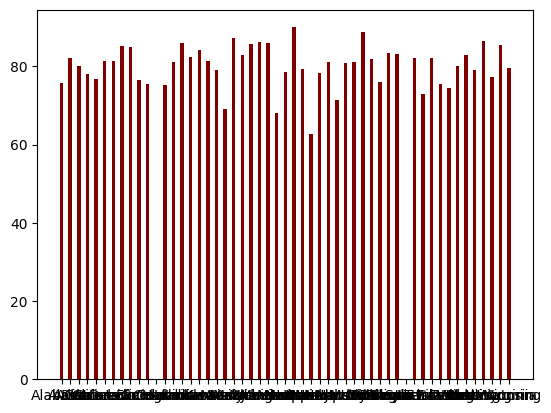

In [149]:
plt.bar(states_legislation['Location Description'], states_legislation['Legislation Percentage'], color ='maroon',
        width = 0.4)

<BarContainer object of 53 artists>

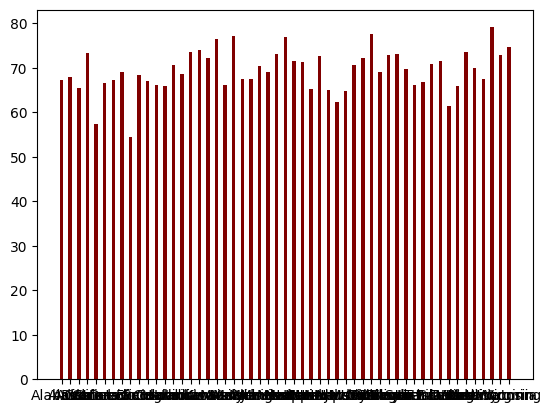

In [152]:
cig_everyday=cig_everyday[['Location Description','Data Value']]
cig_everday=cig_everyday.groupby('Location Description').mean().reset_index()
plt.bar(cig_everday['Location Description'], cig_everday['Data Value'], color ='maroon',
        width = 0.4)

We drew seperate barplots of Legislation percentage against different states and smoking percentage against different states to explore inherent relationship between smoking policies smoking percentage. For smoking percentage, we merely looked at the response that includes everyday smoking in both ecig and cig. It is kind of hard to interpret the relationship between two variables by looking at the two barplots separetely; further analysis is required.

In [ ]:
alt.Chart(merged).mark_circle(opacity = 0.5).encode(
    x = alt.X('Legislation Percentage', scale = alt.Scale(domain=[50,100])),
    y = alt.Y('Data Value:Q', title = 'Smoking Frequency', scale = alt.Scale(zero = False)),
    color = 'Topic Description'
).properties(
    width = 300, height = 300
).facet(
    column = 'Year'
)

/Users/davidhong/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.FacetChart(...)

By concatenating two barplots together, we can see that cigarettes become more dominant from 2016 to 2018. It also can be seen that. It can be seen that the smoking percentage remain static as years progress. Note that we cannot perform regression analysis over time. Thus we are just going to separate the datasets into three groups and perform regression analysis on the dataset.

In [154]:
alt.Chart(merged).mark_bar(opacity = 0.3).transform_filter(
    alt.FieldOneOfPredicate(field = 'Year',
                            oneOf = [2016, 2017, 2018]
                           )).encode(
    x = alt.X('Legislation Percentage', scale = alt.Scale(domain=[60,90])),
    y = alt.Y('Data Value:Q', title = 'Smoking Frequency', scale = alt.Scale(zero = False)),
    color='Topic Description'
).properties(
    width = 300, height = 200
).facet(
    column = 'Year'
)

/Users/davidhong/Library/Python/3.9/lib/python/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.FacetChart(...)

# Planned work
### Questions
I am planning on exploring the relationships between smoking percentage and the other factors of datasets, such as legislation percentange, Genders and types of cigarettes.
### Approaches
I am planning to do regression analysis on data and set gender, type of cigars to be categorical data. So, it is going to have 1s and 0s for each corresponding values and see if any of these factors affect our response value. 

In [ ]:
#create regressional analysis plot for legislation vs data value grouped by states.